In [1]:
import json
import glob
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
REVAL_DIR = os.path.expanduser('../reval_05')
sys.path.append('..')
from imports import load

In [2]:
REVAL_DIR

'../reval_05'

In [3]:
files = glob.glob(f'{REVAL_DIR}/*/*/rich_results.json')
files[:2]

['../reval_05/R101/evaluator_dump_R101_078/rich_results.json',
 '../reval_05/R101/evaluator_dump_R101_053/rich_results.json']

In [4]:
results = [load(f) for f in files]

In [5]:
from itertools import groupby
gb = lambda it, key: groupby(sorted(it, key=key), key)

for key, group in gb(results, lambda x: x['model']):
    print(key, end=' ')

R101 R101_C4 R101_DC5 R101_FPN R50 R50_C4 R50_DC5 R50_FPN X101 

In [6]:
sum(int(r['elapsed']) for r in results)

1054712

In [7]:
def flatten(value):
    if 'results' not in results:
        return value
    result = value.copy()
    aps = {k: v for k, v in result['results']['bbox'].items() if '-' not in k}
    result.update(aps)
    del result['results']
    return result
# flatten(results[0])

In [8]:
c_df = pd.DataFrame([flatten(r) for r in results]).sort_values(['model', 'quality'])
c_df.head()

,quality,model,elapsed,tp,fp,precision,recall,f1,min_score,AP,AP50,AP75,APs,APm,APl
51,1,R101,662.250143,5147,290680,0.017399,0.141654,0.030991,0.05,0.850949,1.641063,0.786802,0.337162,0.724543,1.691920
40,2,R101,662.124931,5150,291295,0.017373,0.141737,0.030951,0.05,0.858069,1.641554,0.785646,0.262078,0.734832,1.670085
28,3,R101,663.974067,6400,339793,0.018487,0.176139,0.033462,0.05,1.156743,2.214548,0.989994,0.407562,1.075822,2.199633
47,4,R101,666.866484,10665,386532,0.026851,0.293519,0.049201,0.05,1.964670,3.590941,1.862873,0.551889,2.125328,3.530575
17,5,R101,668.412551,16264,412795,0.037906,0.447612,0.069893,0.05,3.296703,5.965182,3.181081,1.059228,3.860601,5.428963


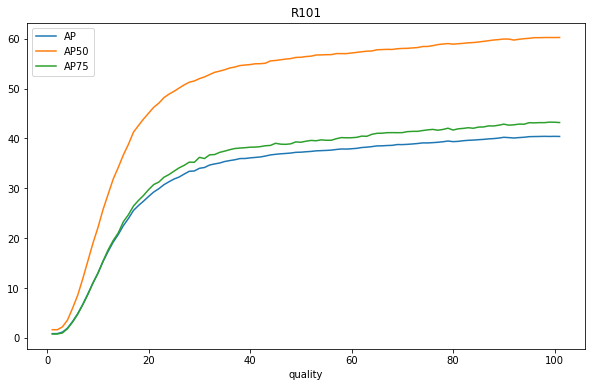

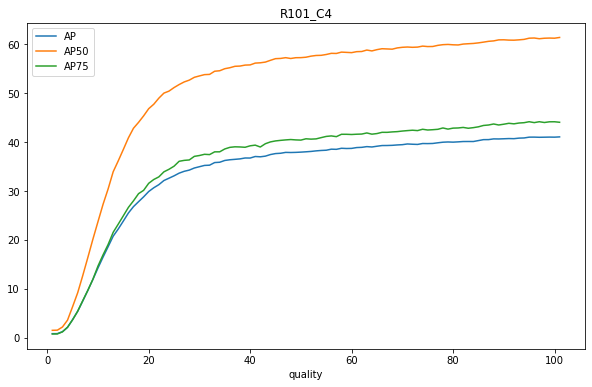

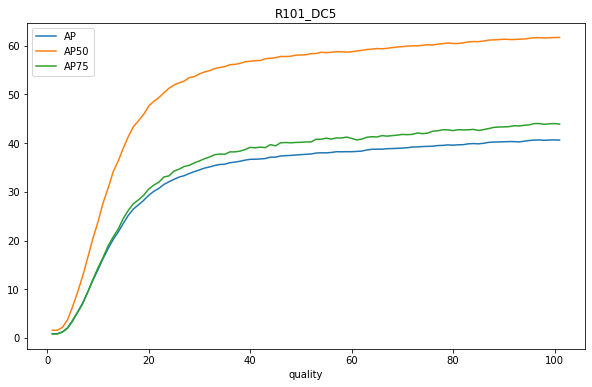

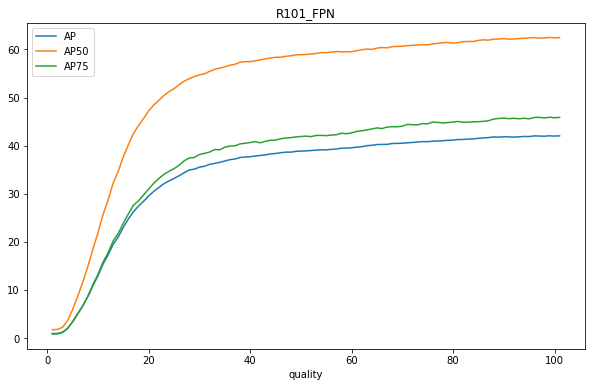

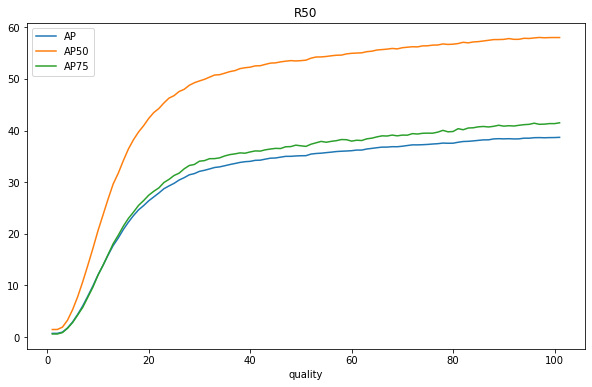

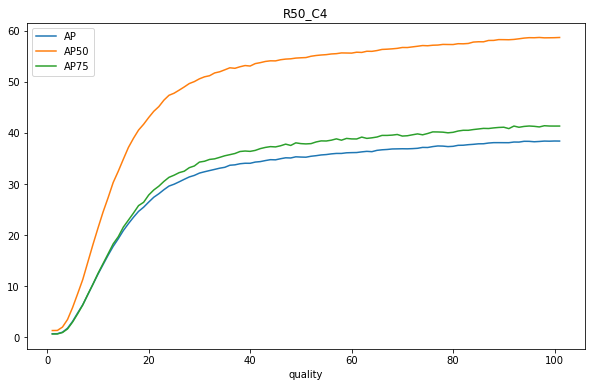

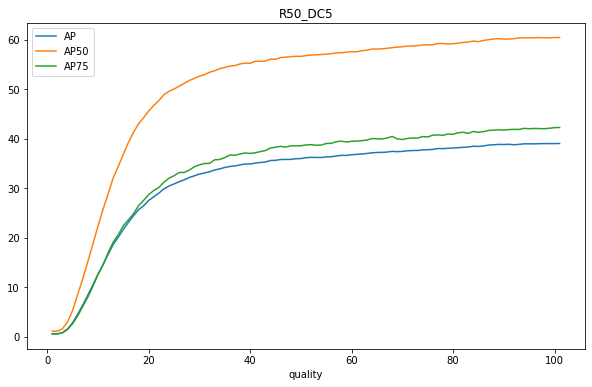

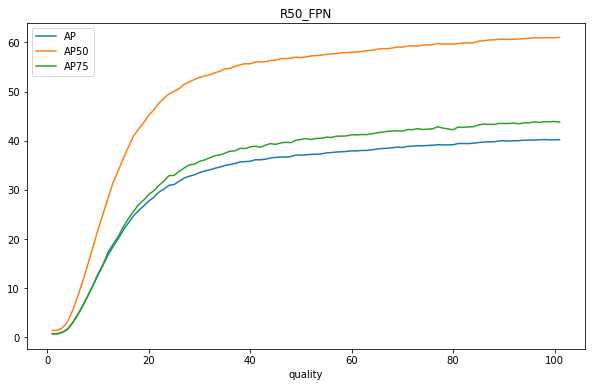

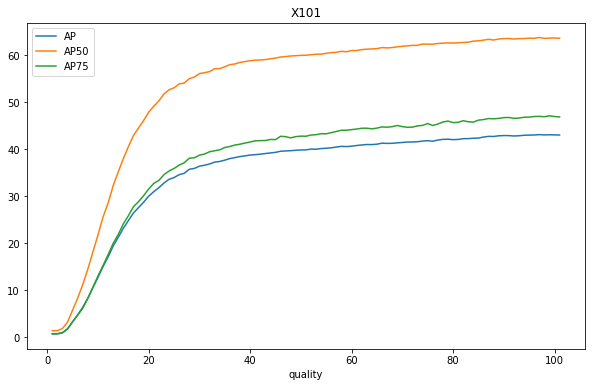

In [9]:
for mc in c_df.model.unique():
    ax = c_df[c_df.model == mc][['quality', 'AP', 'AP50', 'AP75']].plot(x='quality')
    ax.set_title(mc)

In [10]:
avg_pivot = c_df.pivot_table(index='model', values=['AP', 'APl', 'APm', 'APs']).sort_values('AP', ascending=False)
avg_pivot

,AP,APl,APm,APs
model,,,,
X101,34.927685,45.920218,37.778516,20.122565
R101_FPN,34.167798,45.743412,37.028163,19.025153
R101_C4,33.608163,47.307410,37.294725,16.611395
R101_DC5,33.227068,45.751765,36.755736,16.885205
R101,32.810577,43.515592,36.124342,17.436166
R50_FPN,32.528388,43.335347,35.291713,18.184412
R50_DC5,31.721918,43.682657,35.189993,16.106194
R50,31.080935,41.548232,34.032183,16.989777
R50_C4,31.079360,44.221552,34.446147,15.153276


In [11]:
def save_plot(plot, name='', title=None):
    if title:
        plot.set_title(title)
    fig = plot.get_figure()
    fig.set_size_inches(4, 4)
    if name:
        fig.savefig(name)

def plot_models(df, column, norm=False):
    avg_pivot = df.pivot_table(index='model', values=[column]).sort_values(column, ascending=False)
    c_pivot = df.pivot(index='quality', columns='model', values=column).reindex(columns=avg_pivot.index)
    title = f'{column}: all models'
    if norm:
        c_pivot = c_pivot / c_pivot.max(axis=0)
        title += ' (scaled)'
    ax = c_pivot.plot()
    ax.set_title(title)
    return ax


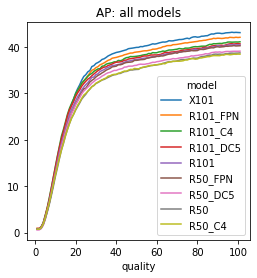

In [12]:
ax = plot_models(c_df, 'AP')
save_plot(ax, 'all_AP_raw.pdf')

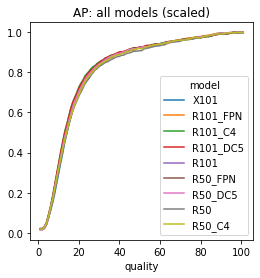

In [13]:
ax = plot_models(c_df, 'AP', True)
save_plot(ax, 'all_AP_scaled.pdf')

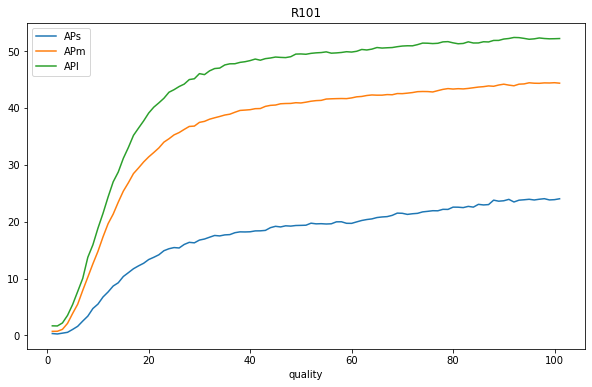

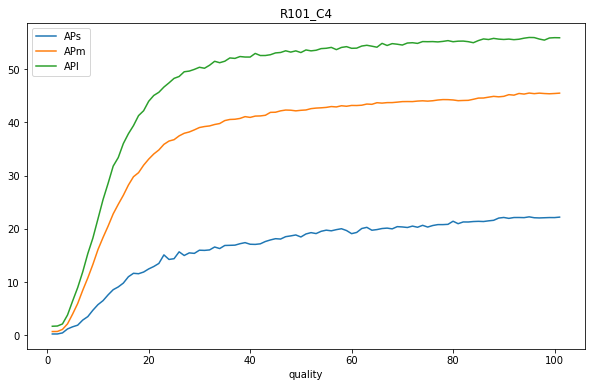

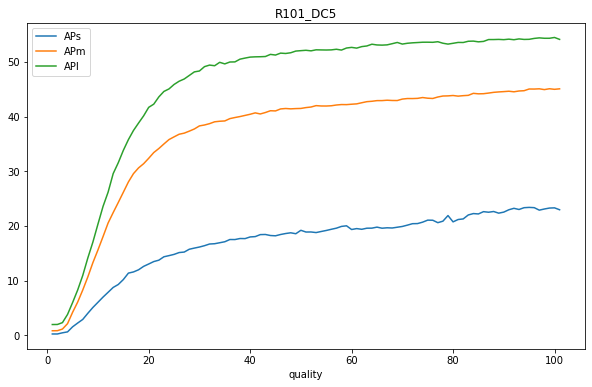

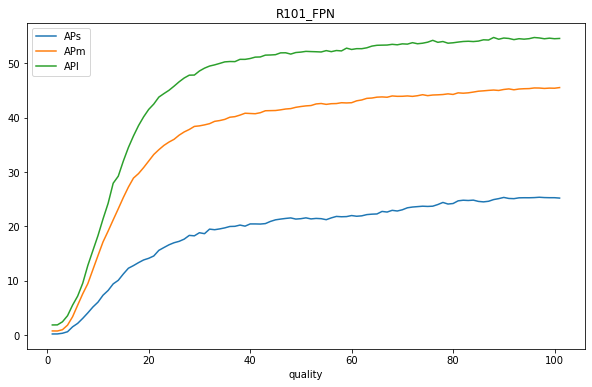

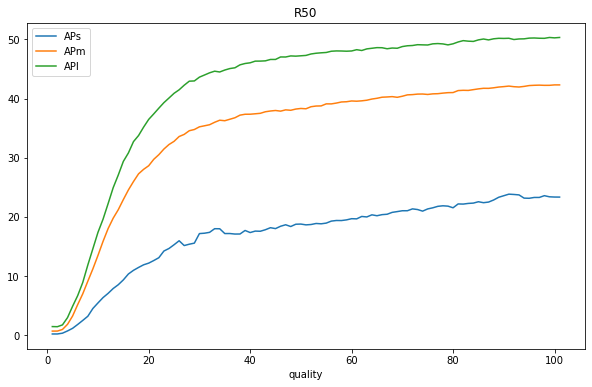

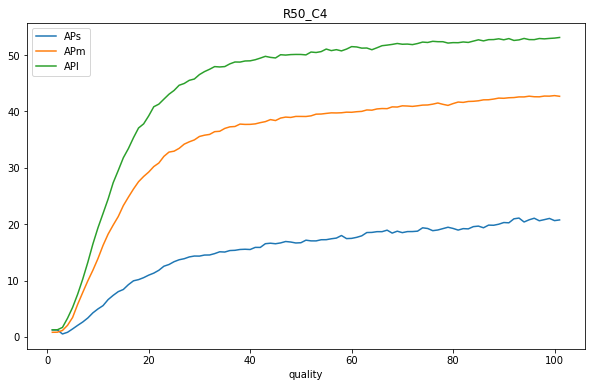

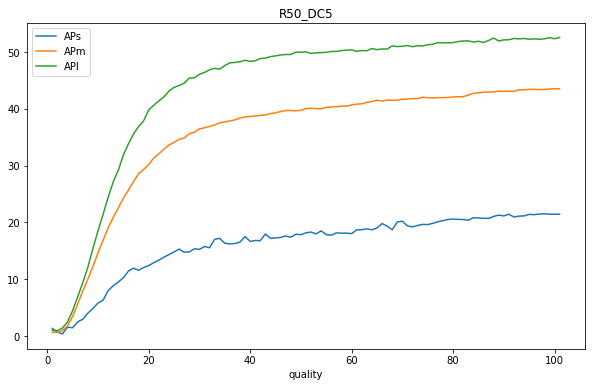

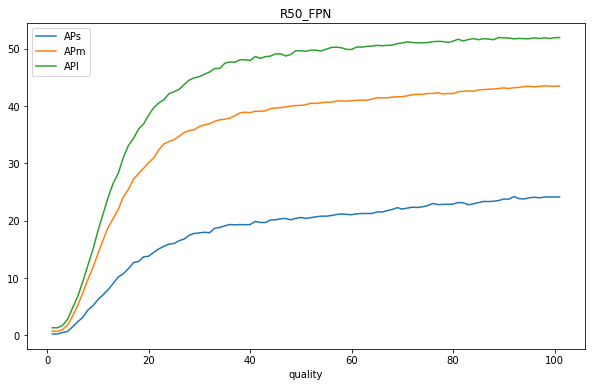

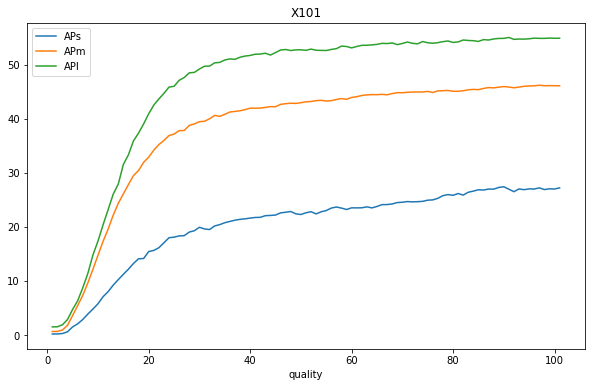

In [14]:
for mc in c_df.model.unique():
    ax = c_df[c_df.model == mc][['quality', 'APs', 'APm', 'APl']].plot(x='quality')
    ax.set_title(mc)

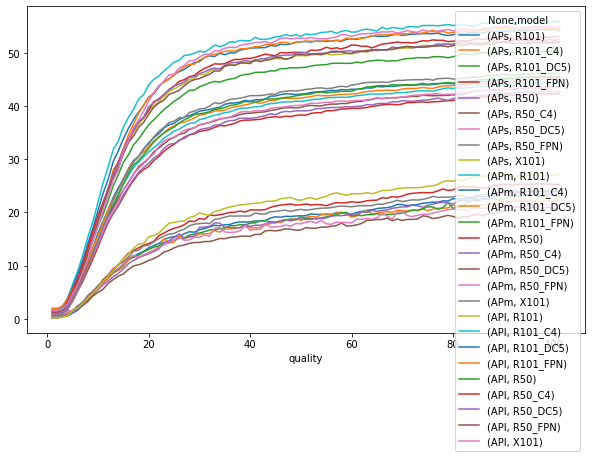

In [15]:
pd.pivot(c_df, index='quality', columns='model', values=['APs', 'APm', 'APl']).plot();

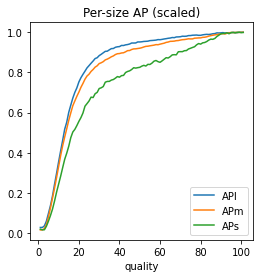

In [16]:
mAPsml = c_df.groupby('quality').agg({x: 'mean' for x in reversed(('APs', 'APm', 'APl'))})
mAPsml = mAPsml / mAPsml.max(axis=0)
plot = mAPsml.plot()
save_plot(plot, 'average_APlms_scaled.pdf', 'Per-size AP (scaled)')

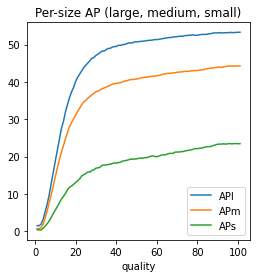

In [17]:
plot = c_df.groupby('quality').agg({x: 'mean' for x in reversed(('APs', 'APm', 'APl'))}).plot()
save_plot(plot, 'average_APlms.pdf', "Per-size AP (large, medium, small)")

In [18]:
rich_files = glob.glob(f'{REVAL_DIR}/*/*/rich_results.json')
rich_files[:2]

['../reval_05/R101/evaluator_dump_R101_078/rich_results.json',
 '../reval_05/R101/evaluator_dump_R101_053/rich_results.json']

In [19]:
df = pd.DataFrame(load(f) for f in rich_files).sort_values(['model', 'quality'])
df.head()

,quality,model,elapsed,tp,fp,precision,recall,f1,min_score,AP,AP50,AP75,APs,APm,APl
51,1,R101,662.250143,5147,290680,0.017399,0.141654,0.030991,0.05,0.850949,1.641063,0.786802,0.337162,0.724543,1.691920
40,2,R101,662.124931,5150,291295,0.017373,0.141737,0.030951,0.05,0.858069,1.641554,0.785646,0.262078,0.734832,1.670085
28,3,R101,663.974067,6400,339793,0.018487,0.176139,0.033462,0.05,1.156743,2.214548,0.989994,0.407562,1.075822,2.199633
47,4,R101,666.866484,10665,386532,0.026851,0.293519,0.049201,0.05,1.964670,3.590941,1.862873,0.551889,2.125328,3.530575
17,5,R101,668.412551,16264,412795,0.037906,0.447612,0.069893,0.05,3.296703,5.965182,3.181081,1.059228,3.860601,5.428963


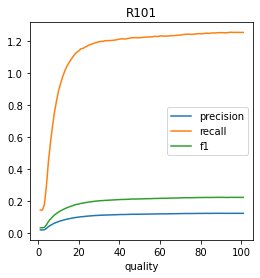

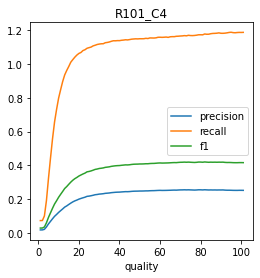

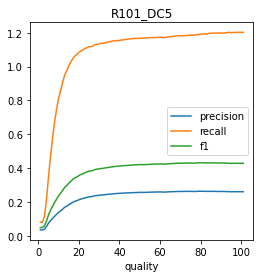

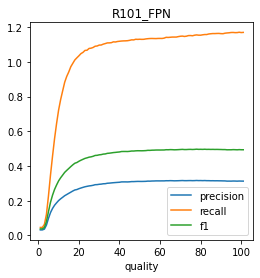

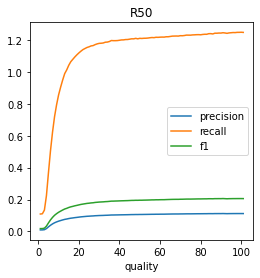

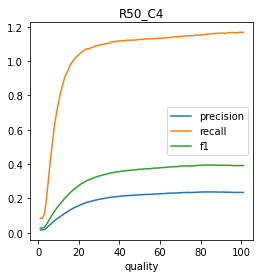

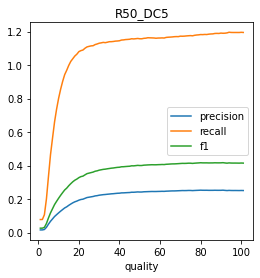

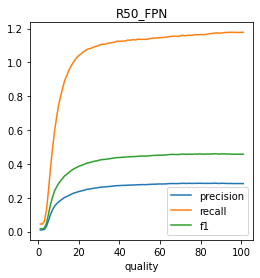

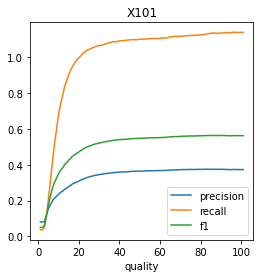

In [20]:
for mc in df.model.unique():
    ax = df[df.model == mc][['quality', 'precision', 'recall', 'f1']].plot(x='quality')
    ax.set_title(mc)
    save_plot(ax, f'{mc}_prf1.pdf')

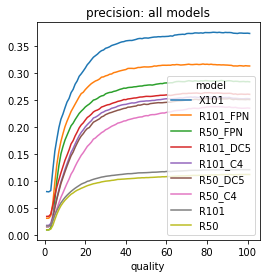

In [21]:
ax = plot_models(df, 'precision')
save_plot(ax, 'all_PPV_raw.pdf')

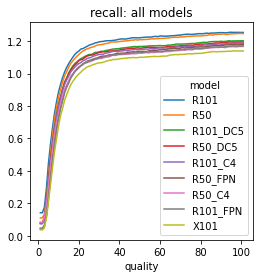

In [22]:
ax = plot_models(df, 'recall')
save_plot(ax, 'all_TPR_raw.pdf')

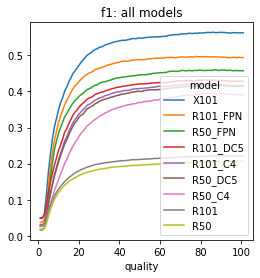

In [23]:
ax = plot_models(df, 'f1')
save_plot(ax, 'all_F1_raw.pdf')

In [24]:
qdf = pd.read_csv('../data/val2017_means_per_Q.csv')
qdf.head(2)

,quality,mean_squared_error,peak_signal_noise_ratio,structural_similarity,filesize,B_per_kpx
0,1,536.18,21.205,0.539,7203.782,9.291
1,2,535.91,21.207,0.539,7207.225,9.295


In [25]:
avgdf = df.groupby('quality').agg('mean')
avgdf.tail(2)

,elapsed,tp,fp,precision,recall,f1,min_score,AP,AP50,AP75,APs,APm,APl
quality,,,,,,,,,,,,,
100,1144.756110,43357.666667,164210.111111,0.244856,1.193276,0.399207,0.050001,40.381796,60.816121,43.674192,23.457767,44.269027,53.271776
101,1097.117104,43358.333333,164403.333333,0.244579,1.193294,0.398850,0.050001,40.392295,60.849938,43.650912,23.476854,44.283071,53.287806


In [26]:
rich = pd.merge(avgdf, qdf, left_index=True, right_index=True)

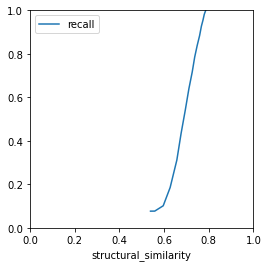

In [27]:
ax = rich.plot(x='structural_similarity', y='recall', xlim=(0, 1), ylim=(0, 1))
save_plot(ax, 'recall_by_ssim.pdf')

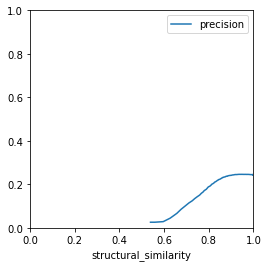

In [28]:
ax = rich.plot(x='structural_similarity', y='precision', xlim=(0, 1), ylim=(0, 1))
save_plot(ax, '')

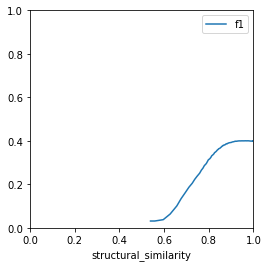

In [29]:
ax = rich.plot(x='structural_similarity', y='f1', xlim=(0, 1), ylim=(0, 1))
save_plot(ax, '')

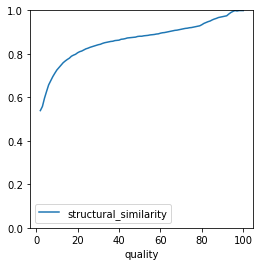

In [30]:
ax = rich.plot(x='quality', y='structural_similarity', ylim=(0, 1))
save_plot(ax, 'SSIM_by_q.pdf')

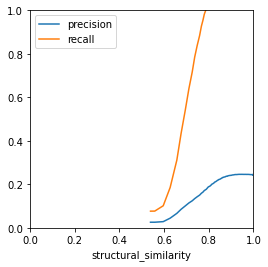

In [31]:
ax = rich[['structural_similarity', 'precision', 'recall']].plot(x='structural_similarity', xlim=(0, 1), ylim=(0, 1))
save_plot(ax, 'pr_by_SSIM.pdf')

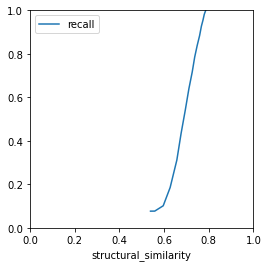

In [32]:
ax = rich.plot(x='structural_similarity', y='recall', xlim=(0, 1), ylim=(0, 1))
save_plot(ax, '')

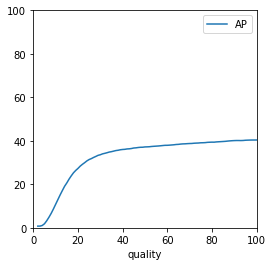

In [33]:
ax = rich.plot(x='quality', y='AP', ylim=(0, 100), xlim=(0, 100))
save_plot(ax, '')

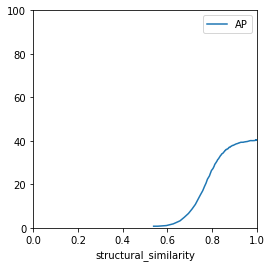

In [34]:
ax = rich.plot(x='structural_similarity', y='AP', xlim=(0, 1), ylim=(0, 100))
save_plot(ax, 'AP_by_SSIM.pdf')

In [35]:
rich.loc[[96, 90, 80, 60, 40, 20], ['AP', 'APl', 'APm', 'APs']].round(1).reset_index()

,index,AP,APl,APm,APs
0,96,40.3,53.2,44.2,23.5
1,90,40.1,53.1,43.9,23.3
2,80,39.4,52.5,43.0,22.1
3,60,38.0,51.3,41.7,20.0
4,40,36.1,49.5,39.6,18.2
5,20,28.4,40.1,31.1,13.1


In [36]:
rich['PPV'] = rich.precision * 100
rich['TPR'] = rich.recall * 100
rich['SSIM'] = rich.structural_similarity * 100
rich['size'] = rich.filesize / 1024
print(rich
     .replace('precision', 100 * rich.precision)
     .set_index('quality')
     .loc[
         [96, 90, 80, 60, 40, 20, 10],
         ['AP', 'AP50', 'AP75', 'APl', 'APm', 'APs', 'TPR', 'PPV', 'SSIM', 'size']
     ]
     #.reset_index()
     .round(1)
     .to_latex()
)

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &    AP &  AP50 &  AP75 &   APl &   APm &   APs &    TPR &   PPV &  SSIM &   size \\
quality &       &       &       &       &       &       &        &       &       &        \\
\midrule
96      &  40.3 &  60.7 &  43.5 &  53.2 &  44.2 &  23.5 &  119.3 &  24.5 &  99.9 &  167.1 \\
90      &  40.1 &  60.5 &  43.2 &  53.1 &  43.8 &  23.2 &  118.9 &  24.6 &  97.1 &  107.0 \\
80      &  39.4 &  59.6 &  42.4 &  52.5 &  43.0 &  22.2 &  117.9 &  24.6 &  93.4 &   74.6 \\
60      &  37.9 &  57.8 &  40.8 &  51.3 &  41.5 &  20.1 &  116.1 &  24.1 &  89.5 &   46.5 \\
40      &  36.0 &  55.5 &  38.4 &  49.4 &  39.6 &  18.3 &  114.3 &  23.2 &  86.3 &   33.9 \\
20      &  27.3 &  44.2 &  28.5 &  38.5 &  30.2 &  12.6 &  105.5 &  19.2 &  80.5 &   21.3 \\
10      &  10.8 &  18.7 &  10.8 &  15.9 &  12.3 &   4.8 &   71.7 &  12.5 &  72.6 &   13.5 \\
\bottomrule
\end{tabular}



In [37]:
rich.dtypes

elapsed                    float64
tp                         float64
fp                         float64
precision                  float64
recall                     float64
f1                         float64
min_score                  float64
AP                         float64
AP50                       float64
AP75                       float64
APs                        float64
APm                        float64
APl                        float64
quality                      int64
mean_squared_error         float64
peak_signal_noise_ratio    float64
structural_similarity      float64
filesize                   float64
B_per_kpx                  float64
PPV                        float64
TPR                        float64
SSIM                       float64
size                       float64
dtype: object